## **Data Mining with Python**
### **Semana 11: Decision Tree**
**Andrés C. Medina Sanhueza**

Lead Advanced Analytics Financial Retail Cencosud-Scotiabank

anmedinas@gmail.com

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from plotnine import *
import numpy as np
import pandas as pd
import warnings 

# Omite Warnings 
warnings.simplefilter("ignore")

In [2]:
iris = datasets.load_iris() 
tempDF = pd.DataFrame(iris.data,columns=iris.feature_names)
tempDF['clase'] = iris.target_names[iris.target]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target, test_size = 0.33, random_state = 42)

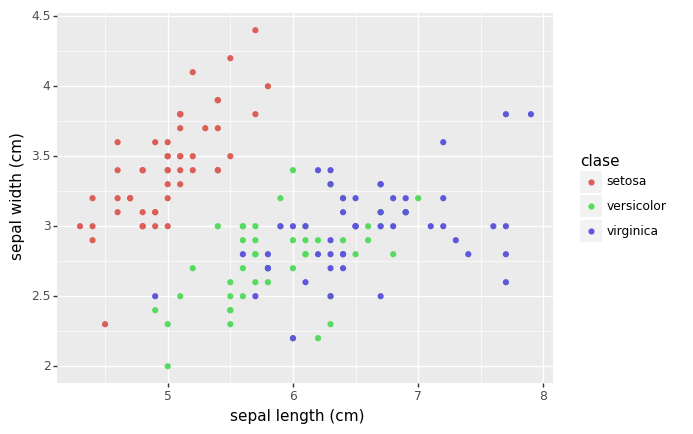

<ggplot: (8754590471147)>

In [5]:
(
    ggplot(tempDF) + 
    aes(x="sepal length (cm)", y="sepal width (cm)",color="clase") + 
    geom_point()
)

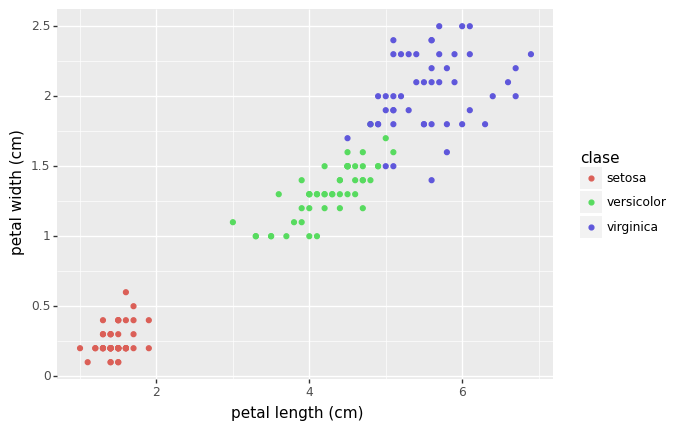

<ggplot: (8754590438072)>

In [6]:
(
    ggplot(tempDF) + 
    aes(x="petal length (cm)", y="petal width (cm)",color="clase") +
    geom_point()
)

---

### **Clase `DecisionTreeClassifier()`**

La clase `DecisionTreeClassifier()` del módulo `sklearn.tree` nos permite implementar un árbol de decisión.

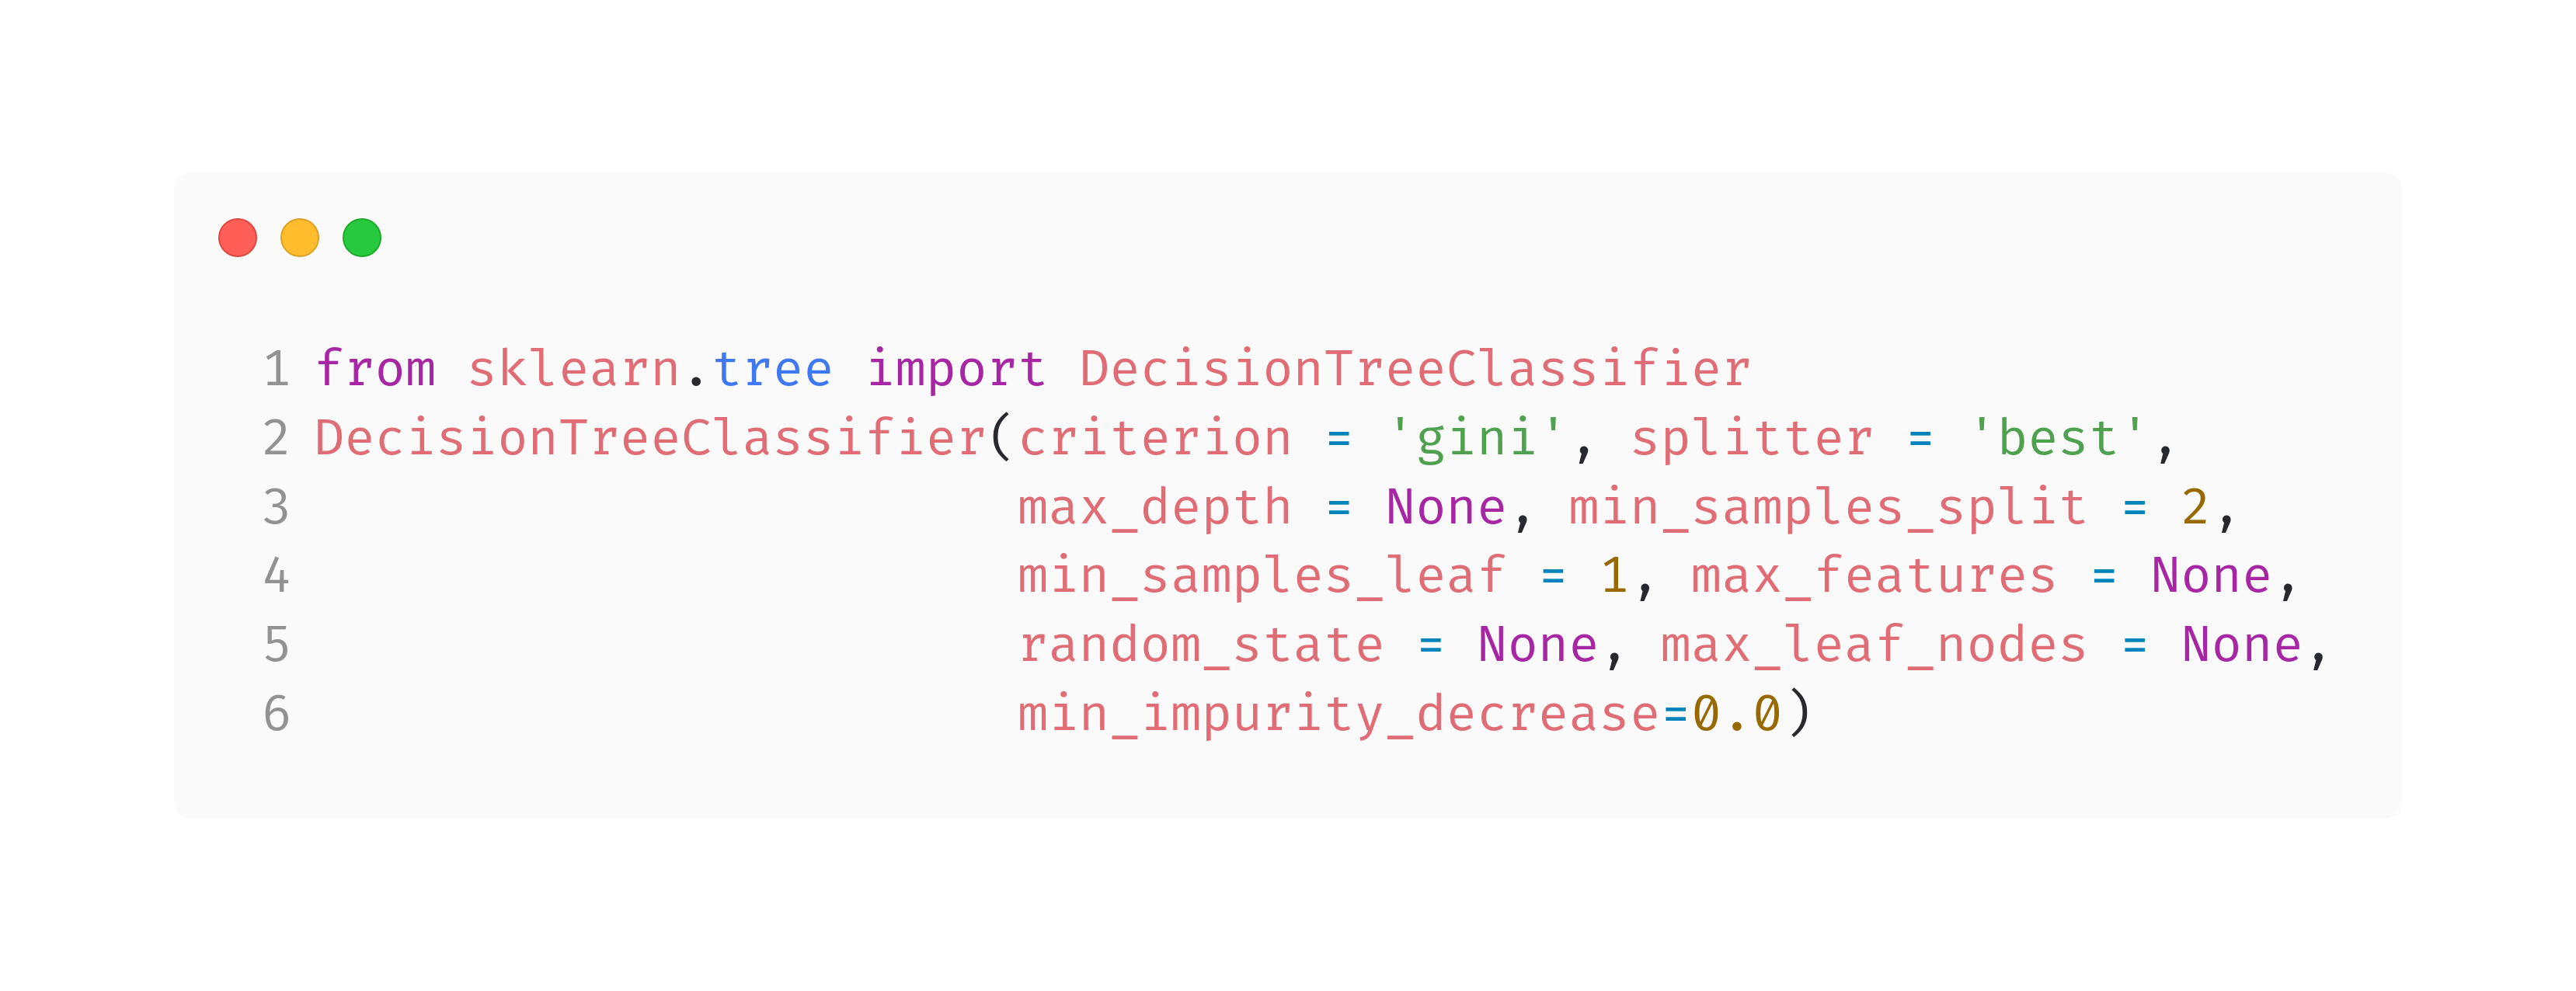

In [7]:
from IPython.display import Image
Image("figs/tree.png")

Los parámetros de la clase, son las siguientes:

* `criterion:` función de score para la generación del árbol, puede ser "gini" o "entropy".
* `splitter:` forma de selección de variable. “best” implica la mejor selección según el score, “random” elige una variable en forma aleatoria (para la implementación del modelo de Hunt).
* `max_depth:` valor entero, indicando la máxima profundidad del árbol.
* `min_samples_split:` valor entero, número mínimo de puntos para separar un nodo. En caso de un valor float se considera como la proporción de los datos.
* `min_samples_leaf:` valor entero, número mínimo de puntos que tiene que tener una hoja. En caso de un valor float se considera como la proporción de los datos.
* `max_features:` valor entero, número máximo de variables a considerar cuando se evalua la separación de un nodo.
* `random_state:` semilla para replicar un experimento
* `max_leaf_nodes:` valor entero indicando el número máximo de nodos hojas.
* `min_impurity_decrease:` valor float. Un nodo se separará si solo si el grado de impureza disminuye más que el valor definido. El grado de impureza se define como: 

$$
\begin{eqnarray*}
\frac{N_t}{N \left(\hbox{impurity}-\frac{N_{t_R}}{N_t}\hbox{right_impurity}-\frac{N_{t_l}}{N_t}\hbox{left_impurity} \right)}
\end{eqnarray*}
$$

donde $N$, $N_t$, $N_{t_l}$, y $N_{t_r}$ son el número de muestras totales, del nodo, del hijo izquierdo, y del hijo derecho, respectivamente.

Los atributos de la clase, son los siguientes:

* `classes_:` las etiquetas de las clases.
* `feature_importances_:` importancia de las variables.
* `tree_:` el árbol generado.

Los métodos o funciones de la clase, son las siguientes:

* `fit(X, y):` "Entrenamiento" del modelo, se tiene que dar los datos y la clase Y
* `predict(X):` predice las etiquetas para los puntos dados
* `predict_proba(X):` predice las probabilidades de las clases para los puntos dados
* `predict_log_proba(X):` predice el logaritmo de las probabilidades de las clases para los puntos dados (mayor estabilidad)

In [8]:
# Creando un árbol de decisión con las condiciones iniciales
from sklearn.tree import DecisionTreeClassifier
AD = DecisionTreeClassifier(max_depth=10)
AD = AD.fit(X_train,y_train)

# Aplicando el modelo a otros datos
resultado = AD.predict(X_test)
print("Resultado de la predicción:\n",resultado)
print("Resultado original:\n",y_test)

# Aplicando el modelo a otros datos
resultado = AD.predict_proba(X_test)
print("Resultado de la predicción:\n",resultado)

Resultado de la predicción:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]
Resultado original:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]
Resultado de la predicción:
 [[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


---

### **Interpretando el Árbol**

El árbol de decisión es sumamente sencillo de interpretar, basta con observar el árbol y la variable `feature_importances_`. `feature_importances_` se calcula como la reducción (normalizada, para que la suma sea 1.0) de la reducción de la función de score para esa variable.

In [9]:
print(iris.feature_names)
print("importancia de las variables:\n", AD.feature_importances_)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
importancia de las variables:
 [0.01256535 0.04005207 0.55087649 0.39650608]


---

### **Visualización el Árbol**

Para visualizar el árbol se utilizará la función `plot_tree` del módulo `sklearn.tree`.

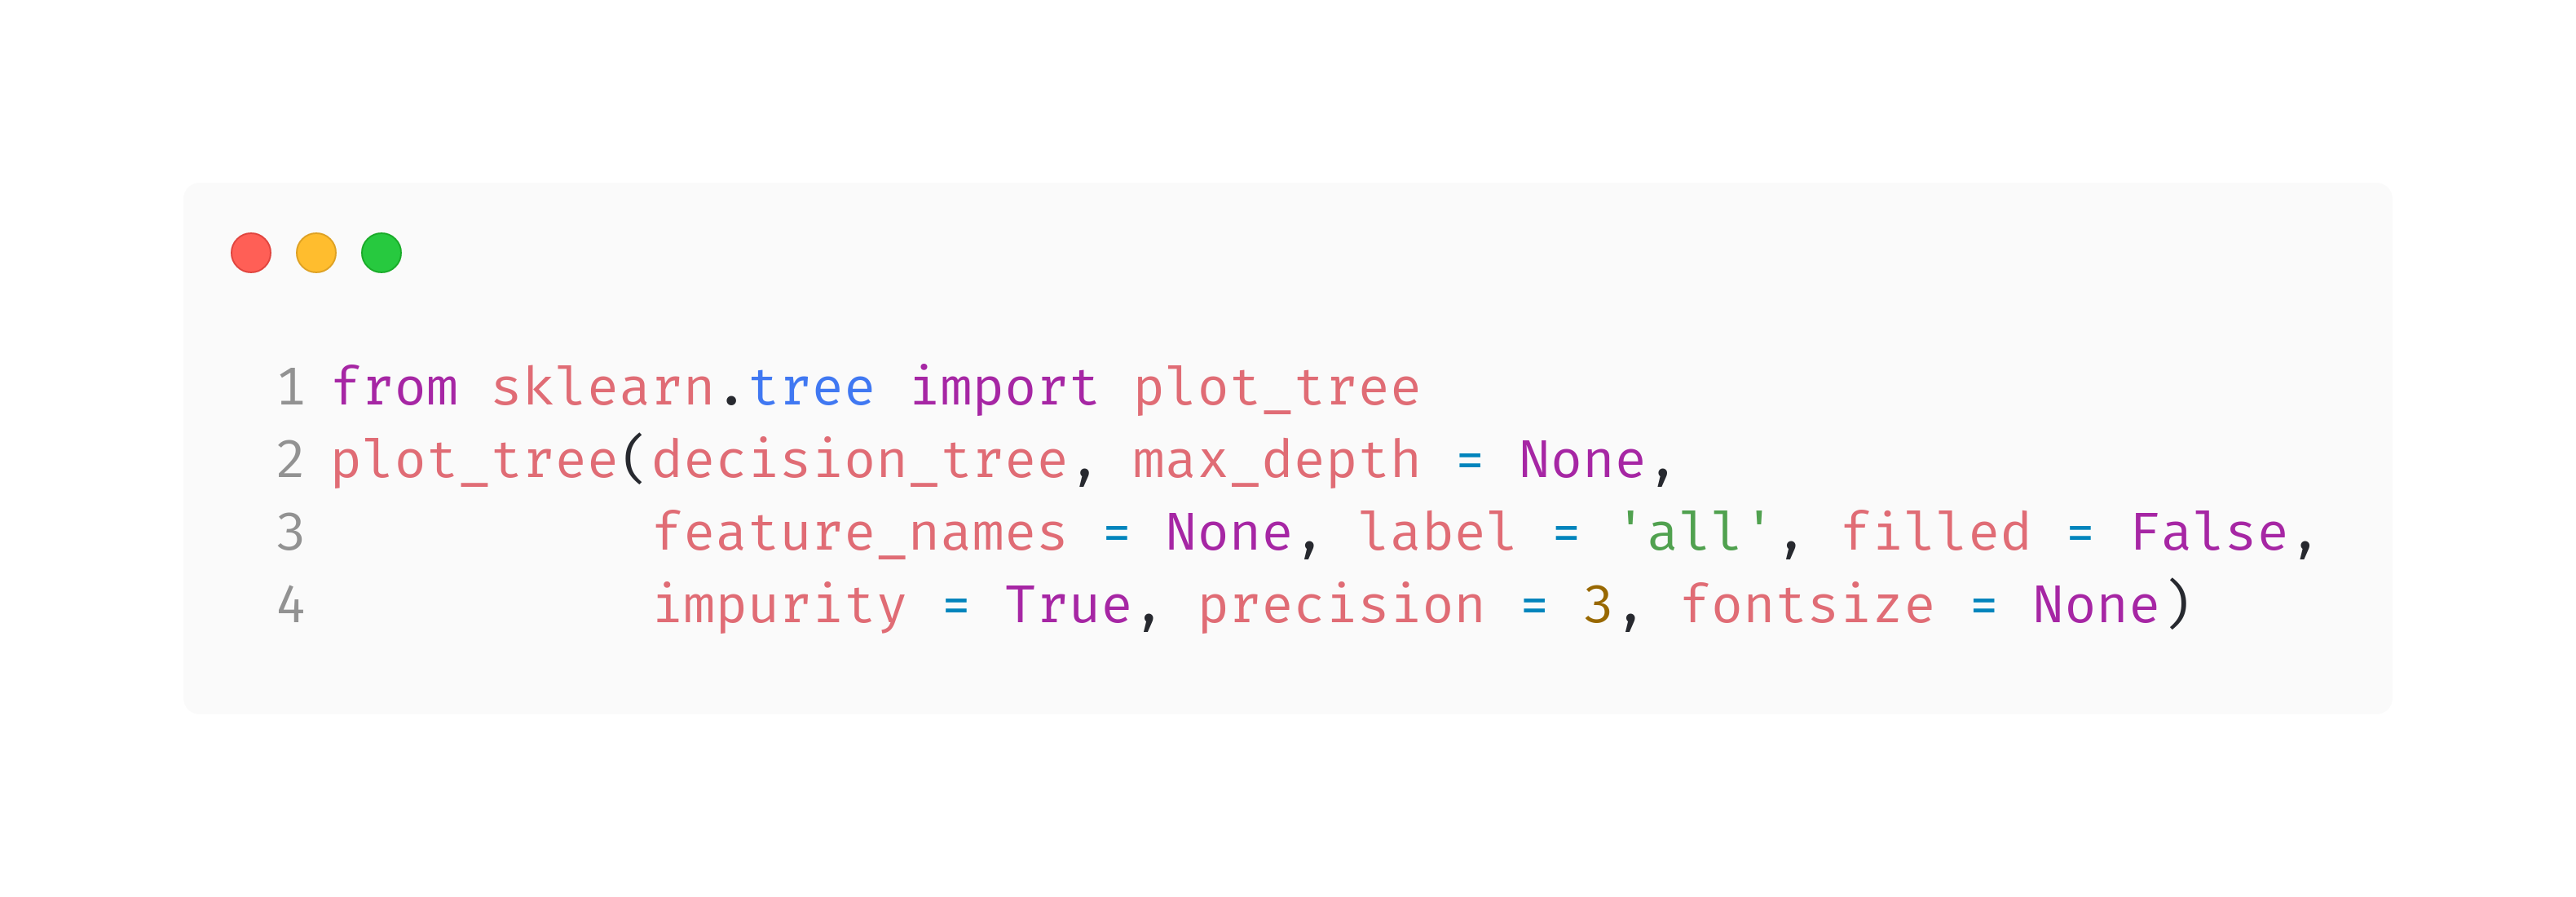

In [10]:
from IPython.display import Image
Image("figs/plot_tree.png")

Los parámetros de la clase, son las siguientes:

* `decision_tree:` el árbol de decisión a mostrar
* `max_depth:` valor entero, profundidad máxima a mostrar del árbol de decisión
* `feature_names:` lista de string con los nombres a mostrar de las variables (caso contrario se muestra “X[0]”, “X[1]”, …)
* `label:` para mostrar la impuridad de los nodos ‘all’ (todos los nodos), ‘root’ (la raíz), ‘none’ (ninguno)
* `filled:` valor booleano, si es verdadero se colorea el árbol basado en el número de puntos que pertenecen a la clase
* `impurity:` valor booleano, si se muestra la impuridad de cada nodo
* `precision:` valor entero, número de dígitos para la precisión
* `fontsize:` valor entero, tamaño de la letra

**Observación:** Por definición del módulo, la rama izquierda corresponde al valor `True`.

importancia de las variables:
 [0.01256535 0.04005207 0.55087649 0.39650608]


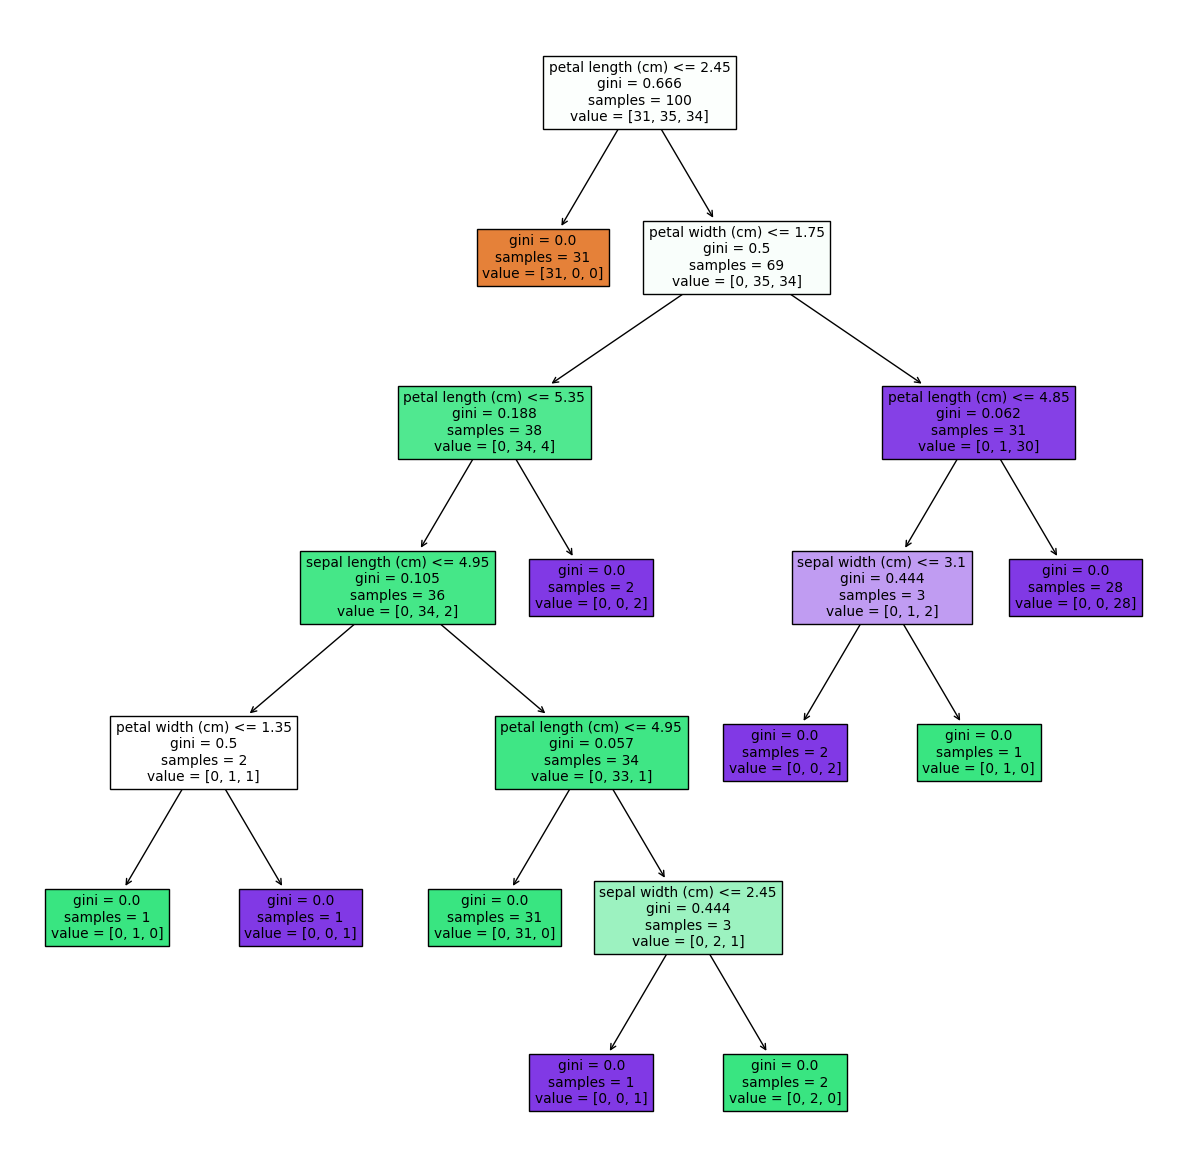

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Definiendo el tamaño de la figura
plt.figure(figsize=(15,15)) 

print("importancia de las variables:\n",AD.feature_importances_)
plot_tree(AD,filled=True,feature_names=iris.feature_names)

# Mostrando el árbol
plt.show() 

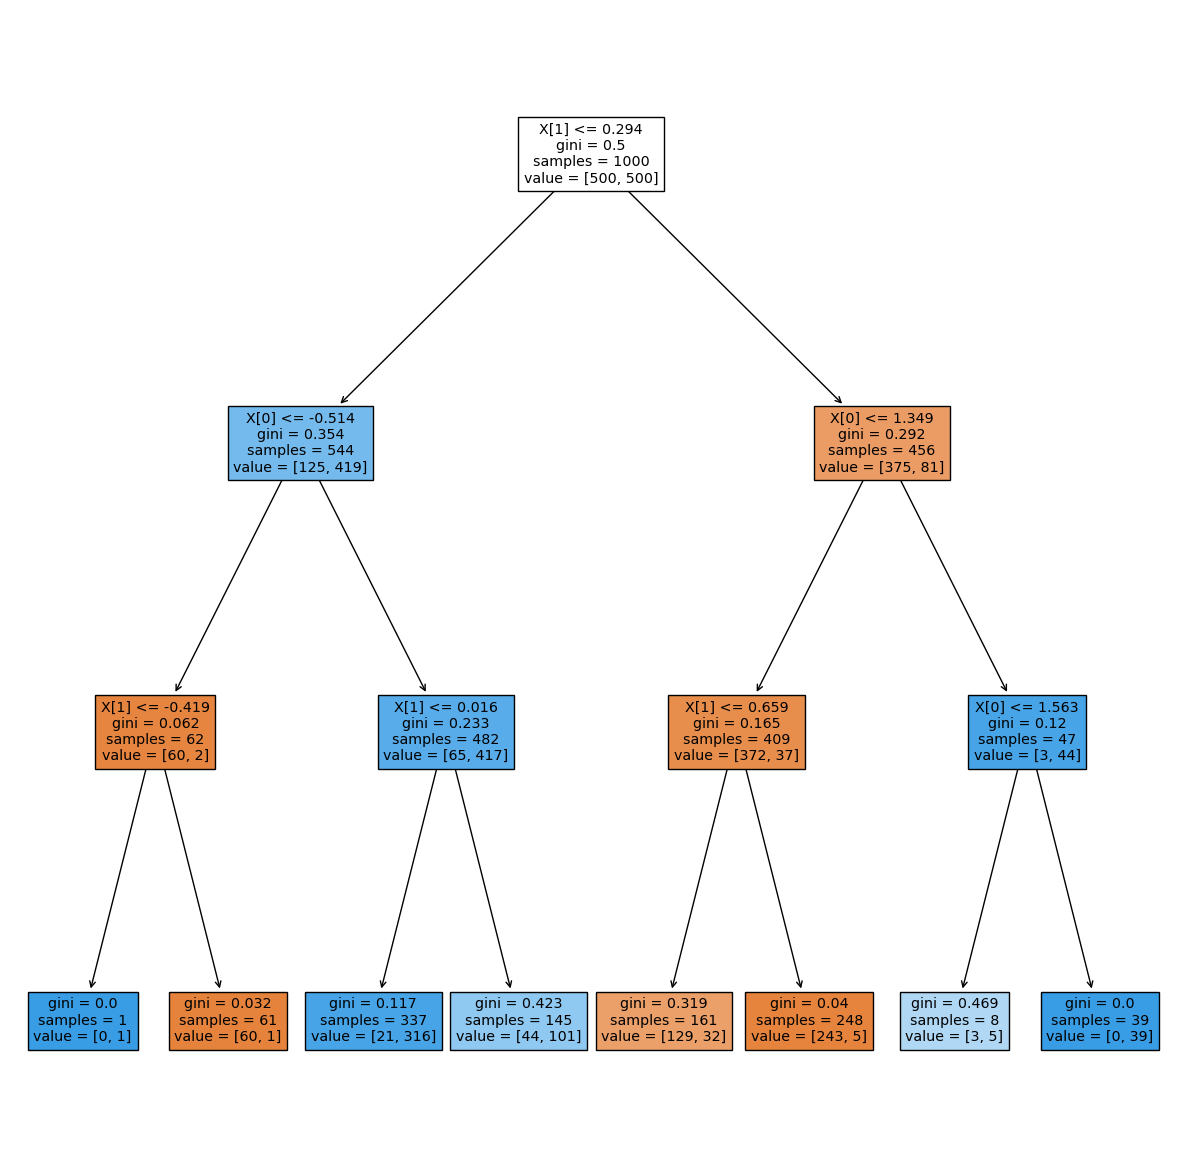

In [12]:
# Visualización del árbol
# Generando dos lunas

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons

tempData = make_moons(n_samples=1000,shuffle=True, noise=0.3, random_state=None)
tempData[1]
tempData[0][:,0] = tempData[0][:,0]
tempData[0][:,1] = tempData[0][:,1]

# Entrenando el modelo y aplicando a una grilla de puntos para su visualización
AD = DecisionTreeClassifier(max_depth=3)
AD = AD.fit(tempData[0],tempData[1])

# Creando una grilla de evaluación
x = np.arange(-2.0, 3.5, 0.05)
y = np.arange(-1.5, 2.5, 0.05)
temp = np.meshgrid(x, y)
dataTest=pd.DataFrame(temp[0].flatten(),columns=["xx"])
dataTest.insert(1,"yy",temp[1].flatten())

# Prediciendo y graficando el output
estimatedProbs=AD.predict_proba(dataTest.iloc[:,0:2])

# Creando el dataframe a graficar
output=(((1-estimatedProbs[:,0])*255).astype("int"))
dataTest.insert(2, "ClassOutput", "0")
for i in range(dataTest.shape[0]):
    dataTest.ClassOutput[i]='#%02x%02x%02x' % (255-output[i],0,output[i])

# Colores para los puntos originales
colorData=pd.DataFrame(list(map(str,tempData[1])),columns=["colorClass"])
colorData.colorClass[colorData.colorClass=="0"]="Red"
colorData.colorClass[colorData.colorClass=="1"]="Blue"
    
plt.figure(figsize=(15,15)) # definiendo el tamaño de la figura
plot_tree(AD,filled=True)
plt.show() # mostrando el árbol

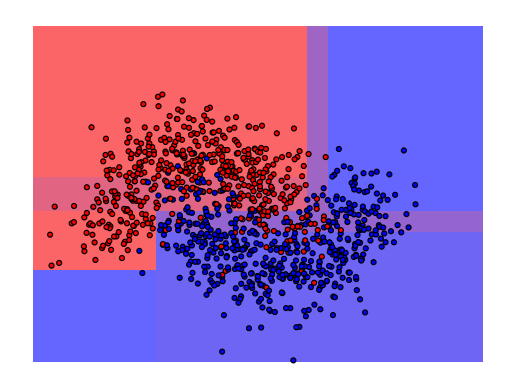

<ggplot: (8754590364362)>

In [13]:

# Generating the plot with ggplot/plotnine
(
    ggplot() + 
    theme_void() + 
    geom_tile(aes(x=dataTest.xx,y=dataTest.yy),alpha=0.6,show_legend=False,fill=dataTest.ClassOutput) +
    geom_point(aes(x=tempData[0][:,0],y=tempData[0][:,1]),show_legend=False,color="black",fill=colorData)
)

---

### **Datos Categóricos**

Recordemos que `sklearn` no ha querido trabajar con texto, por lo cual, todos los datos hay que cambiarlos a números antes de aplicar el modelo.

Para aplicar un árbol de decisión sobre datos categóricos es necesario transformar las variables utilizando one hot encoding. Recuerden, one hot encoding transforma una variable de $x$ valores en $x$ variables binarias (una por valor) o $x-1$ variables binarias (la ausencia de todas las variables indican la presencia de un valor).

La clase `OneHotEncoder` del módulo `sklearn.preprocessing` permite realizar este proceso en forma rápida 

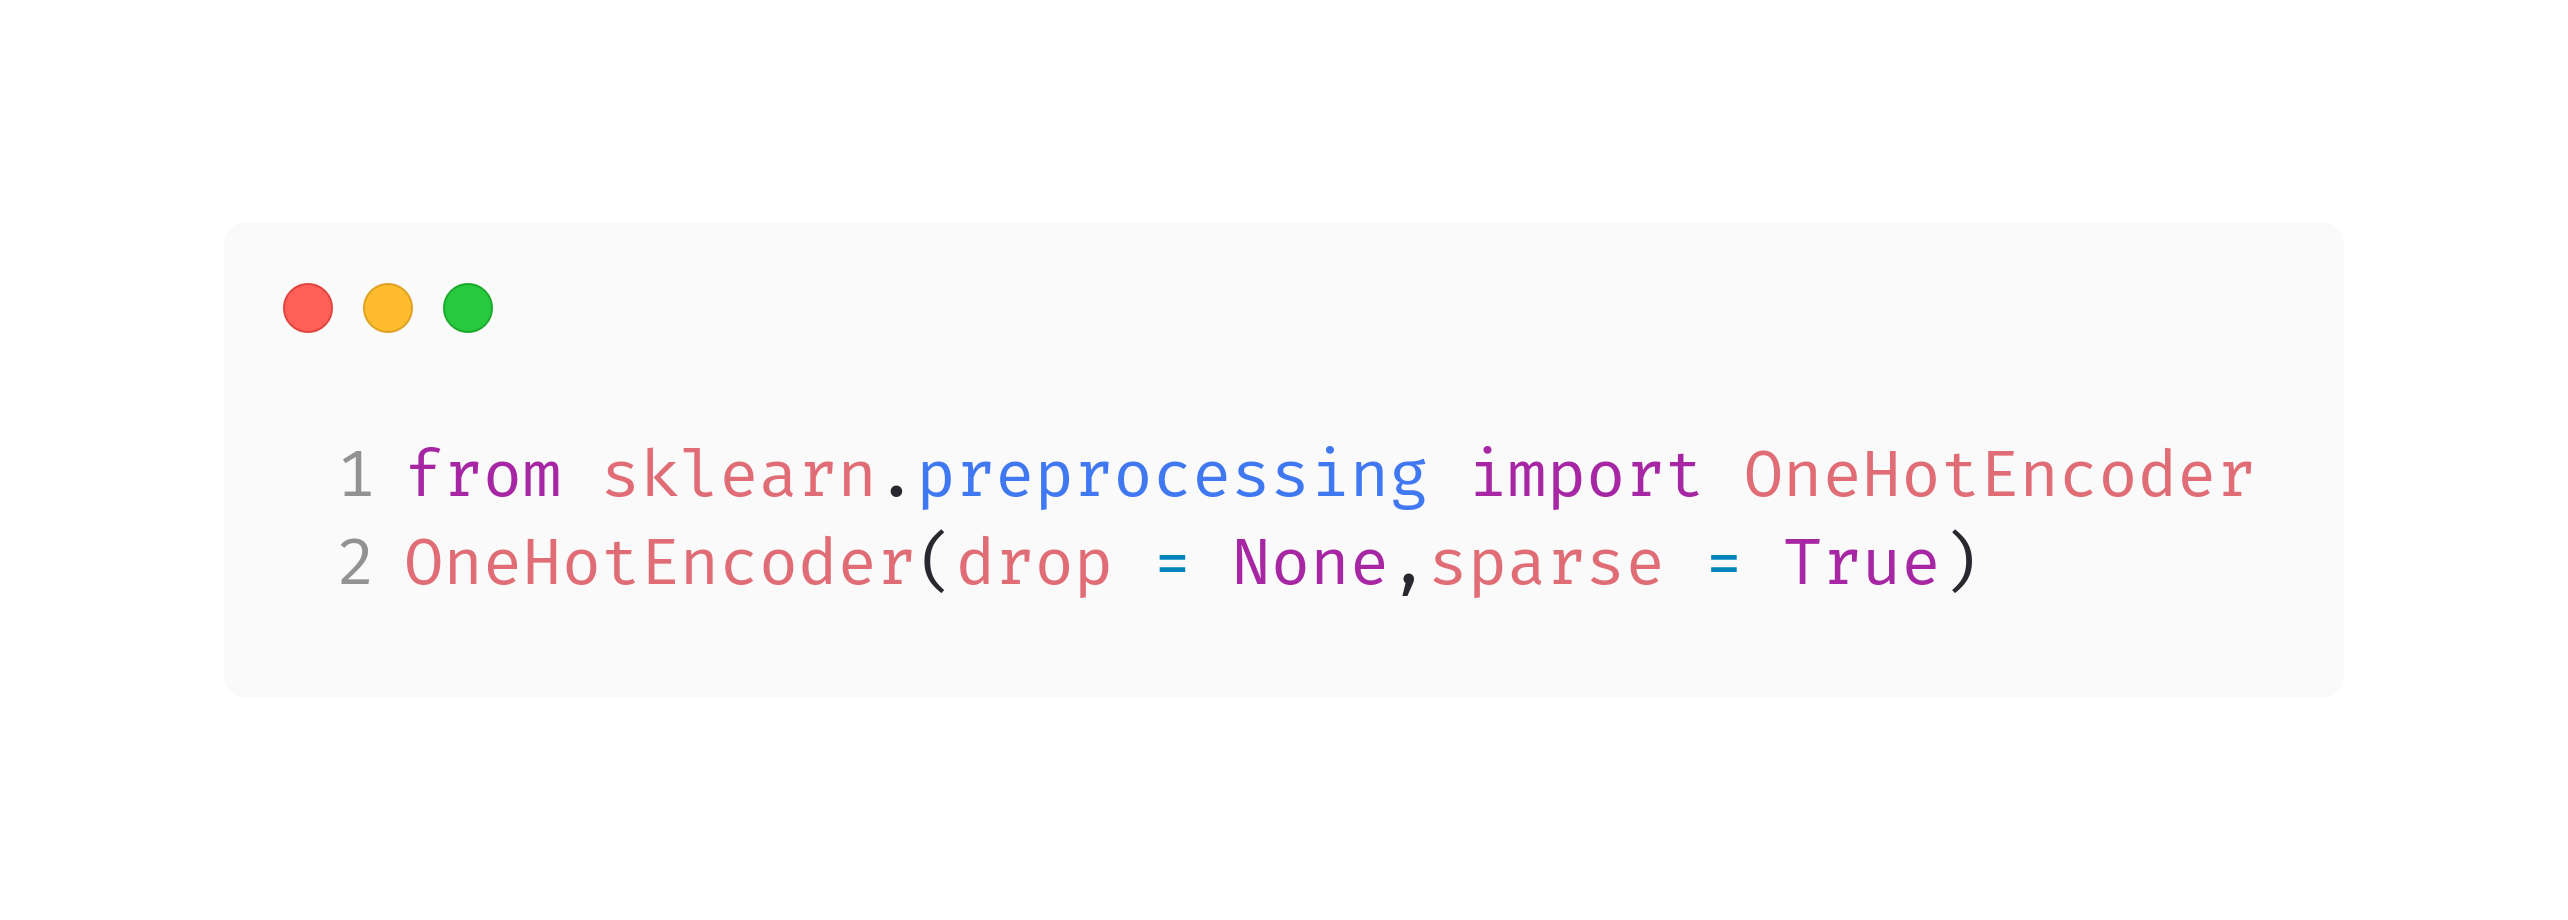

In [14]:
from IPython.display import Image
Image("figs/onehot.png")

Los parámetros de la clase, son las siguientes:

* `drop:` método a utilizar para descartar uno de los valores.
None: mantiene todos los valores.
‘first’: bota el primer valor de una variable.
‘if_binary’: bota el primer valor de las variable binarias, y mantiene todos los valores en las otras variables.
* `sparse:` valor booleano indicando si se quiere devolver una matriz sparse (menos memoria, mala visualización)

Los atributos de la clase, son los siguientes:

* `categories_:` un arreglo con la lista de valores para cada categoría.
* `drop_idx_:` arreglo indicando el tipo de drop realizado para esa variable.

Los métodos o funciones de la clase, son las siguientes:
* `fit(X):` "Entrenamiento" del modelo.
* `fit_transform(X):` aprende las variables y aplica la transformación.
* `transform(X):` transforma el set de datos $X$.
* `inverse_transform(X):` aplica la transformación inversa a los datos adquiridos.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Leyendo los datos de banco
df = pd.read_csv('bank.csv',sep=';')
print("datos original\n",df.head(2),"\n")

# Seleccionando variables categoricas y aplicando el modelo
categorical = df.iloc[:,[1,2,3,4,6,7,8]]
OHE = OneHotEncoder(drop = "if_binary",sparse = False)
tempDF = OHE.fit_transform(categorical)

print(categorical)
print(tempDF.shape)

# Creando mapa para agregar el nombre de las "nuevas" variables 
nombreVarOrigCategorical = df.columns[[1,2,3,4,6,7,8]]
nombreVars = ["" for x in range(tempDF.shape[1])]
index = 0
indexOrig = 0
for i in OHE.categories_:
    if len(i) > 2:
        for j in i:
            nombreVars[index] = j
            index += 1
    else:
        nombreVars[index] = nombreVarOrigCategorical[indexOrig]
        index += 1
    indexOrig += 1
    
tempDF = pd.DataFrame(tempDF,columns=nombreVars)

#Uniendo con el dataset anterior
tempDF = pd.concat([tempDF, df.iloc[:,[0,5,11,12,13,14,16]]], axis=1)
print("\nnuevo dataset\n",tempDF.head(2))

X_train, X_test, y_train, y_test = train_test_split(tempDF.iloc[:,0:31],tempDF.iloc[:,31], test_size=0.33, random_state = 42)

datos original
    age         job  marital  education default  balance housing loan  \
0   30  unemployed  married    primary      no     1787      no   no   
1   33    services  married  secondary      no     4789     yes  yes   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no   

                job  marital  education default housing loan   contact
0        unemployed  married    primary      no      no   no  cellular
1          services  married  secondary      no     yes  yes  cellular
2        management   single   tertiary      no     yes   no  cellular
3        management  married   tertiary      no     yes  yes   unknown
4       blue-collar  married  secondary      no     yes   no   unknown
...             ...      ...        ...     ...     ...  ...       ...
4516       services  married  secondary    

In [16]:
# Creando un objeto Arbol de decisión con las condiciones iniciales
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
AD = DecisionTreeClassifier(max_depth=2)
AD = AD.fit(X_train,y_train)

# Aplicando el modelo a otros datos
resultado = AD.predict(X_test)
print("Resultado de la predicción:\n",resultado)
print("Resultado original:\n",y_test)

# Generando la matriz de confusion
print("\n\nMatriz de confusión\n",confusion_matrix(y_test,resultado),"\n\n")

# Aplicando el modelo a otros datos
resultado=AD.predict_proba(X_test)
print("Resultado de la predicción:\n",resultado)

Resultado de la predicción:
 ['no' 'no' 'no' ... 'yes' 'no' 'no']
Resultado original:
 2398    no
800     no
2288    no
2344    no
3615    no
        ..
3034    no
2405    no
218     no
2498    no
1563    no
Name: y, Length: 1492, dtype: object


Matriz de confusión
 [[1296   38]
 [ 119   39]] 


Resultado de la predicción:
 [[0.96985816 0.03014184]
 [0.8376494  0.1623506 ]
 [0.96985816 0.03014184]
 ...
 [0.41216216 0.58783784]
 [0.8376494  0.1623506 ]
 [0.8376494  0.1623506 ]]


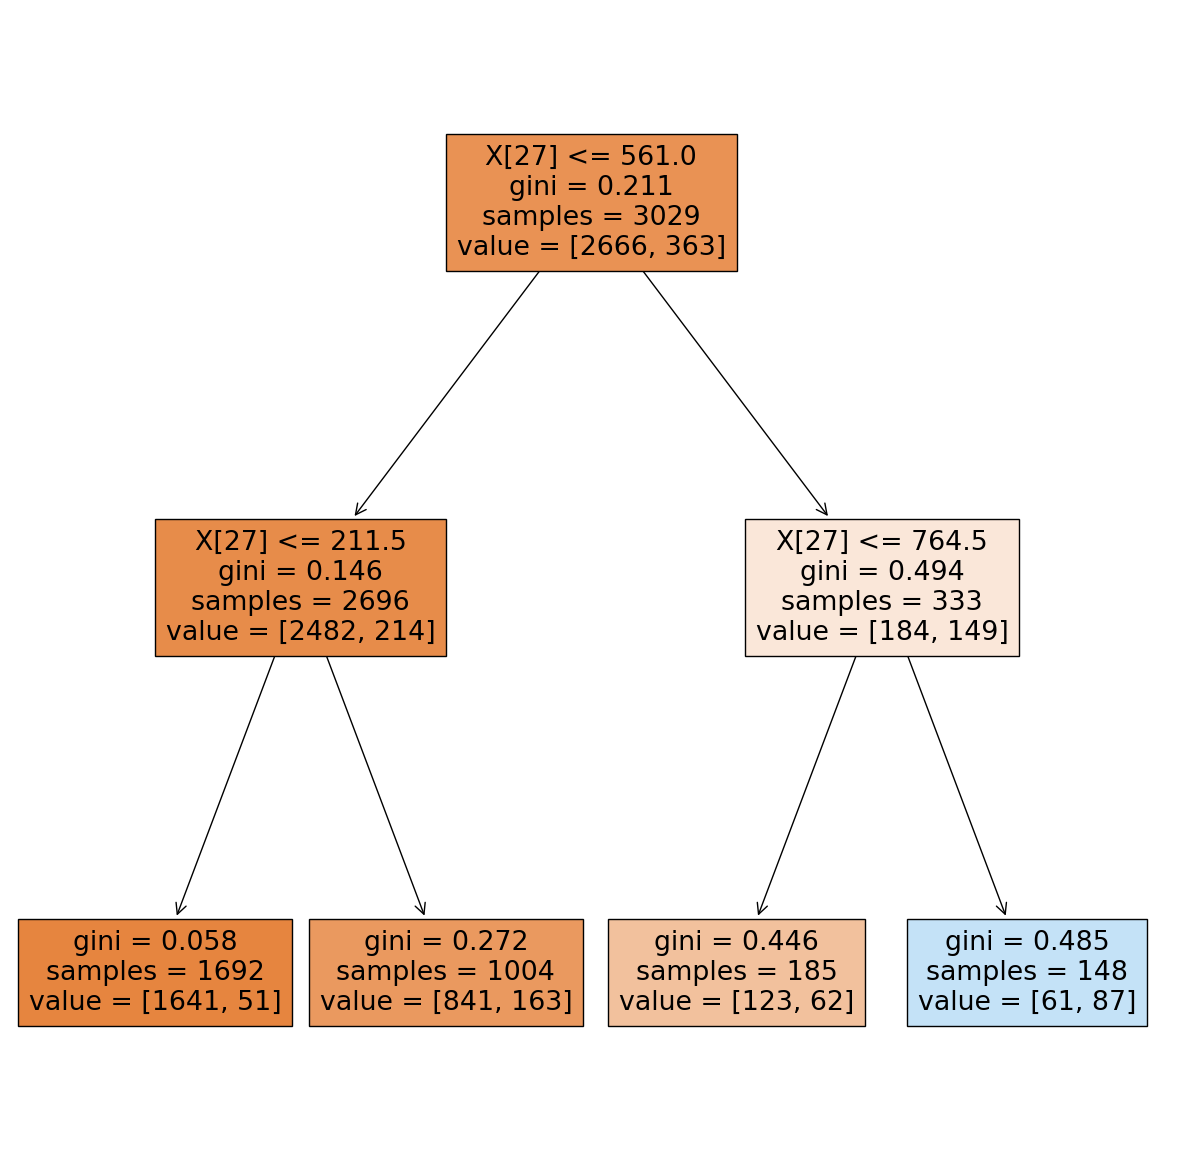

In [17]:
# Definiendo el Tamaño de la figura
plt.figure(figsize=(15,15)) 
plot_tree(AD,filled=True)

# Mostrando el árbol
plt.show() 